<a href="https://colab.research.google.com/github/chancey922/covid19-model/blob/main/%E7%BE%8E%E5%9B%BD%E7%96%AB%E6%83%85LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 导入包

In [3]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
14/14 [==============================] - 4s 55ms/step - loss: 0.2727 - accuracy: 0.0000e+00 - val_loss: 0.1541 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 28ms/step - loss: 0.0800 - accuracy: 0.0000e+00 - val_loss: 0.0337 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0

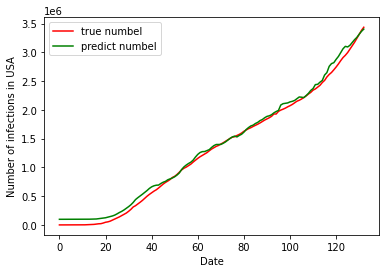

In [4]:
# 流程如下： 数据处理（读取，清洗， 标准化， 重塑 ，分割） ，模型构建， 训练 ，预测， 可视化
data = pd.read_csv('Convid_19_american.csv')
data = data.iloc[:, 1:]
# 数据质量较好，不用清洗
# 标准化 
mean = data['total_confired_count'].mean(); std = data['total_confired_count'].std() 
data = (data - data.mean(axis=0))/ data.std(axis=0)
data = data.values
# 用十天的数据预测当前感染人数，构建训练数据
def data_gen(step=10, start_loc=0, end_loc=142):
    x, y =[], []
    for i in range(len(data)-step):
        x_temp = data[i:i+step, :-1]
        y_temp = data[i+step:i+step+1,-1]
        x.append(x_temp.tolist())
        y.append(y_temp.tolist())
    x = np.array(x) ; y=np.array(y)
    return x,y
train_x, train_y = data_gen()

# 构建模型 
model = Sequential()
model.add(LSTM(128, input_shape=(10, 4), dropout= 0.5, recurrent_dropout=0.2, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss= 'mse', optimizer='Adam', metrics=['accuracy'])
print(model.summary()) 

# 训练
LSTM = model.fit(train_x, train_y, batch_size=10, epochs=100,
                 validation_data =(train_x, train_y)) 
# 预测 
predict_y = model.predict(train_x)

#可视化
import matplotlib.pyplot as plt
train_y =  train_y * std + mean
predict_y = predict_y*std + mean 
plt.figure()
plt.plot(range(len(train_y)), train_y, label="true numbel", color = 'red')
plt.plot(range(len(train_y)), predict_y, label="predict numbel", color = 'green')
plt.xlabel('Date')
plt.ylabel('Number of infections in USA')
plt.legend()
plt.show()
